      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]
[24.  21.6 34.7 33.4 36.2]


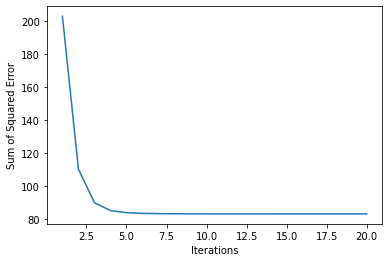

Root mean squared error :  0.738966525893207


In [ ]:
# 경사하강법에 의한 선형회귀 학습
import numpy as np

class LinearRegressionGD(object): # 경사하강법을 이용한 선형회귀 클래스
    def __init__(self, eta=0.001, n_iter=20): # 초기화
        self.eta = eta 
        self.n_iter = n_iter

    def fit(self, X, y):# 학습
        self.w_ = np.zeros(1+X.shape[1]) 
        self.cost_ = [ ]

        for i in range(self.n_iter): # 계산식
            output = self.net_input(X) 
            errors = (y - output) 
            self.w_[1:] += self.eta*X.T.dot(errors) 
            self.w_[0] += self.eta * errors.sum() 
            cost = (errors**2).sum()/2.0
            self.cost_.append(cost) 
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X): # 예측
        return self.net_input(X)

import pandas as pd 
from sklearn.datasets import load_boston 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

boston = load_boston() # 보스턴 집값
data = pd.DataFrame(boston.data, columns=boston.feature_names) # 데이터 프레임 생성


X = data[['RM', 'PTRATIO']].values  # 입력
y = boston.target# 출력. 가격

print(data.head()) # 데이터 출력
print(y[0:5])

sc_x = StandardScaler() # 표준화. 평균 0 분산 1
sc_y = StandardScaler() # 표준화. 평균 0 분산 1
X_std = sc_x.fit_transform(X) # 정규화
y_std = sc_y.fit_transform(y[:,np.newaxis]).flatten() # 정규화
X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, test_size=0.2, random_state=123) # 데이터 분할. 테스트 데이터 0.2

Ir = LinearRegressionGD() # 경사하강법 선형회귀
Ir.fit(X_train, y_train)# 학습

import matplotlib.pyplot as plt 

plt.plot(range(1, Ir.n_iter+1), Ir.cost_) 
plt.ylabel('Sum of Squared Error')
plt.xlabel('Iterations') 
plt.show()

from sklearn.metrics import mean_squared_error 
preds = Ir.predict(X_test) # 예측
mse = mean_squared_error(y_test,preds) #  평균 제곱근 오차
print('Root mean squared error : ', np.sqrt(mse))

In [ ]:
# 선형회귀, 리지 회귀, 라소 회귀, 일레스틱 넷 기반 회귀
import numpy as np 
import pandas as pd 
from sklearn.datasets import load_boston 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 
from sklearn.metrics import mean_squared_error

boston = load_boston() # 보스턴 집값
data = pd.DataFrame(boston.data,columns=boston.feature_names) # 데이터 프레임 생성
X = data[['RM', 'PTRATIO', 'RAD', 'TAX', 'LSTAT', 'CRIM', 'NOX', 'B']].values # 8개의 파라미터 이용
y = boston.target # 집값 예측

sc_x = StandardScaler() # 표준화. 평균 0 분산 1
sc_y = StandardScaler() # 표준화. 평균 0 분산 1
X_std = sc_x.fit_transform(X) # 정규화
y_std = sc_y.fit_transform(y[:,np.newaxis]).flatten() # 정규화
X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, test_size=0.2, random_state=123) # 데이터 분할. 테스트 데이터 0.2

linear = LinearRegression()  # 선형 회귀
ridge = Ridge(alpha=1.0, random_state=0) # 리지회귀 
lasso = Lasso(alpha=1.0, random_state=0) # 라소회귀
enet = ElasticNet(alpha=1.0, l1_ratio=0.5)# 일레스틱 넷 기반 회귀

linear.fit(X_train, y_train) # 선형 회귀 학습
ridge.fit(X_train, y_train) # 리지회귀  학습
lasso.fit(X_train, y_train) # 라소회귀 학습
enet.fit(X_train, y_train)# 일레스틱 넷 기반 회귀 학습


linear_pred = linear.predict(X_train) # 선형 회귀 예측
ridge_pred = ridge.predict(X_train) # 리지회귀  예측
lasso_pred = lasso.predict(X_train) # 라소회귀 예측
enet_pred = enet.predict(X_train) # 일레스틱 넷 기반 회귀 예측
print('Linear - RMSE for training data: ', np.sqrt(mean_squared_error(y_train, linear_pred))) # 선형 회귀 평균 제곱근 오차
print('Ridge - RMSE for training data: ', np.sqrt(mean_squared_error(y_train, ridge_pred))) # 리지회귀 평균 제곱근 오차
print('Lasso - RMSE for training data: ', np.sqrt(mean_squared_error(y_train, lasso_pred))) # 라소회귀 평균 제곱근 오차
print('Elastic Net - RMSE for training data:', np.sqrt(mean_squared_error(y_train, enet_pred)))# 일레스틱 넷 기반 회귀 평균 제곱근 오차

# 테스트 데이터에 대해 각 모델 적용
linear_pred = linear.predict(X_test) 
ridge_pred = ridge.predict(X_test) 
lasso_pred = lasso.predict(X_test) 
enet_pred = enet.predict(X_test)

# 테스트 데이터에 대한 각 모델별 평균 제곱근 오차
print('\nLinear - RMSE for test data: ', np.sqrt(mean_squared_error(y_test, linear_pred))) 
print('Ridge - RMSE for test data: ', np.sqrt(mean_squared_error(y_test, ridge_pred))) 
print('Lasso - RMSE for test data:', np.sqrt(mean_squared_error(y_test, lasso_pred))) 
print('Elastic Net - RMSE for test data:', np.sqrt(mean_squared_error(y_test, enet_pred)))

Linear - RMSE for training data:  0.527646292874511
Ridge - RMSE for training data:  0.527652437617983
Lasso - RMSE for training data:  1.0017823143577615
Elastic Net - RMSE for training data: 0.8463715147933433

Linear - RMSE for test data:  0.6299606779044657
Ridge - RMSE for test data:  0.6299657952065146
Lasso - RMSE for test data: 0.9936481587307943
Elastic Net - RMSE for test data: 0.8578764629897222


      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]


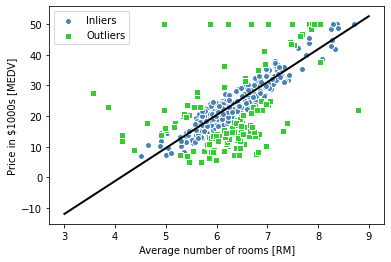

In [ ]:
# RANSAC 기반 선형회귀
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt
from sklearn.linear_model import RANSACRegressor, LinearRegression

boston = load_boston() # 보스턴 집값
data=pd.DataFrame(boston.data, columns=boston.feature_names) # 데이터 프레임 생성
print(data.head()) # 데이터 일부 출력
X=data[['RM']].values # 방 개수
y=boston.target # 가격

ransac=RANSACRegressor(LinearRegression(), max_trials=100, min_samples=50, loss='absolute_loss', residual_threshold=5.0, random_state=0) # 랜색 객체. 선형회귀를 통해. 최대 100번 시도. 데이터 50개.

ransac.fit(X, y) # 학습

inlier_mask=ransac.inlier_mask_ # 정상은 ㅌ루
outlier_mask=np.logical_not(inlier_mask) # 이상치
line_X = np.arange(3,10,1) 
line_y_ransac = ransac.predict(line_X[:,np.newaxis]) # 예측

plt.scatter(X[inlier_mask], y[inlier_mask], c='steelblue', edgecolor='white', marker='o',label='Inliers') # 선택된 정상 데이터
plt.scatter(X[outlier_mask], y[outlier_mask], c='limegreen', edgecolor='white', marker='s', label='Outliers') # 이상치 출력
plt.plot(line_X, line_y_ransac, color='black', lw=2) # 선
plt.xlabel("Average number of rooms [RM]") # x축 이름
plt.ylabel("Price in $1000s [MEDV]") # y축 이름
plt.legend(loc='upper left') 
plt.show()

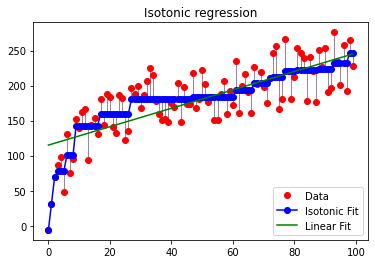

In [ ]:
# 이소토닉 회귀
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from sklearn.linear_model import LinearRegression
from sklearn.isotonic import IsotonicRegression
from sklearn.utils import check_random_state

# 데이터 생성
n = 100
x = np.arange(n) #  배열 나타내기
rs = check_random_state(0)
y = rs.randint(-50, 50, size=(n,)) + 50. * np.log1p(np.arange(n))

ir = IsotonicRegression() # 이소토닉 회귀
y_ = ir.fit_transform(x, y)
lr = LinearRegression() # 선형회귀
lr.fit(x[:, np.newaxis], y)

segments = [[[i, y[i]], [i, y_[i]]] for i in range(n)]
lc = LineCollection(segments, zorder=0)
lc.set_array(np.ones(len(y)))
lc.set_linewidths(np.full(n, 0.5))

fig = plt.figure()
plt.plot(x, y, 'r.', markersize=12) # 생성된 데이터
plt.plot(x, y_, 'b.-', markersize=12) # 이소토닉 회귀 결과
plt.plot(x, lr.predict(x[:, np.newaxis]), 'g-') # 선형회귀 결과
plt.gca().add_collection(lc)
plt.legend(('Data', 'Isotonic Fit', 'Linear Fit'), loc='lower right')
plt.title('Isotonic regression') # 그래프 이름
plt.show() # 그래츠 출력

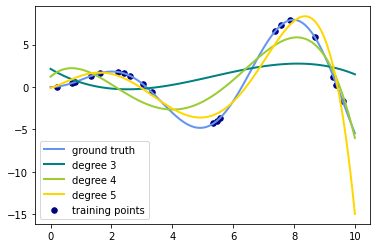

In [ ]:
# 다항회귀
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# 데이터 생성
def f(x):
  return x*np.sin(x)

x_plot=np.linspace(0,10,100) # 1차원 배열 생성
x=np.linspace(0,10,100)# 1차원 배열 생성
rng=np.random.RandomState(0) # 랜덤
rng.shuffle(x) # 섞기
x=np.sort(x[:20])# 정렬
y=f(x) # 함수
X=x[:,np.newaxis]
X_plot=x_plot[:,np.newaxis]

colors=['teal', 'yellowgreen','gold'] # 각 차원을 표시할 선의 색
lw=2
plt.plot(x_plot, f(x_plot), color='cornflowerblue',linewidth=lw,label="ground truth") # 데이터 연결한 선
plt.scatter(x, y, color='navy',s=30, marker='o',label='training points') # 데이터 점으로 표시

for count, degree in enumerate([3,4,5]): # 3,4,5차식
  model=make_pipeline(PolynomialFeatures(degree), Ridge()) # 각 차식에 결과를 리지를 이용
  model.fit(X,y) # 학습
  y_plot=model.predict(X_plot) # 예측
  plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw, label="degree %d" %degree)

plt.legend(loc='lower left')
plt.show()

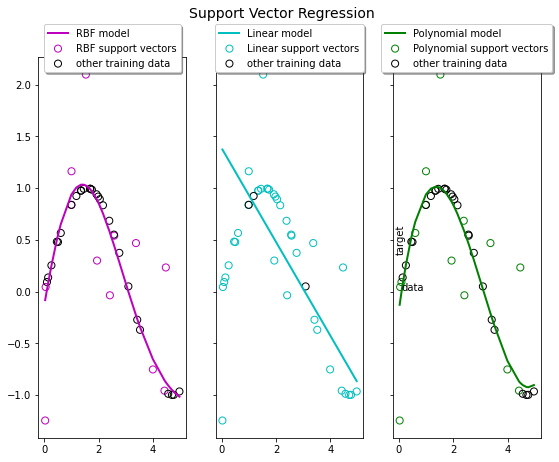

In [ ]:
# SVR 적용 회귀
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np

# 학습 데이터 만들기
X=np.sort(5*np.random.rand(40,1),axis=0)
y=np.sin(X).ravel()
y[::5]+=3*(0.5-np.random.rand(8)) # 잡음 추가

svr_rbf=SVR(kernel='rbf',C=100,gamma=0.1,epsilon=.1) # Radial Basis Function
svr_lin=SVR(kernel='linear',C=100,gamma='auto') # 선형
svr_poly=SVR(kernel='poly',C=100,gamma='auto',degree=3,epsilon=.1,coef0=1) # 다항


lw=2
svrs=[svr_rbf,svr_lin,svr_poly]
kernel_label=['RBF','Linear','Polynomial']
model_color=['m','c','g']

fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(9,7),sharey=True)
for ix, svr in enumerate(svrs):# 세개의 커널에 대해
  axes[ix].plot(X, svr.fit(X,y).predict(X), color=model_color[ix],lw=lw,
                label='{} model'.format(kernel_label[ix])) # 학습 하고 예측한다
  axes[ix].scatter(X[svr.support_], y[svr.support_],facecolor='none', 
                 edgecolor=model_color[ix],s=50,label='{} support vectors'.format(kernel_label[ix])) # 해당 SVR 데이터
  axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)),svr.support_)],
                   y[np.setdiff1d(np.arange(len(X)),svr.support_)],
                   facecolor='none',edgecolor='k',s=50,label='other training data') # 그 외 트레이닝 데이터
  axes[ix].legend(loc='upper center',bbox_to_anchor=(0.5,1.1),ncol=1,fancybox=True,shadow=True)

plt.text(0.5,0.04,'data',ha='center',va='center')
plt.text(0.06,0.5,'target',ha='center',va='center',rotation='vertical')
plt.suptitle("Support Vector Regression", fontsize=14)
plt.show()

In [ ]:
# 강화학습
import numpy as np
import matplotlib.pyplot as plt
import time

class Environment: # 환경
  cliff=-3; road=-1; sink=-2; goal=2 # 보상 값
  goal_position=[2,3]
  reward_list=[[road,road,road,road],[road,road,sink,road],[road,road,road,goal]] 
  reward_list1=[['road','road','road','road'],['road','road','sink','road'],['road','road','road','goal']]

import numpy as np
import matplotlib.pyplot as plt
import time

class Environment: # 환경
  cliff=-3; road=-1; sink=-2; goal=2 # 보상 값
  goal_position=[2,3]
  reward_list=[[road,road,road,road],[road,road,sink,road],[road,road,road,goal]] 
  reward_list1=[['road','road','road','road'],['road','road','sink','road'],['road','road','road','goal']]

  def __init__(self): # 초기값
    self.reward=np.asarray(self.reward_list) # reward_list를 배열로

  def move(self,agent, action): # 움직임
    done=False # 완료 아님
    new_pos=agent.pos+agent.action[action] # 현재 에이전트 위치+움직이는 방향=새로운 위치 => 새로운 상태

    if self.reward_list1[agent.pos[0]][agent.pos[1]]=='goal': # 현재위치가 goal이면
      reward=self.goal # 보상을 goal
      observation=agent.set_pos(agent.pos) # 현재 상태를 주어진 상태로 결정
      done=True # 끝남을 알리는 True

    # x가 0보다 작거나 x의 크기보다 커졌을때
    elif new_pos[0]<0 or new_pos[0]>=self.reward.shape[0] or new_pos[1]<0 or new_pos[1]>= self.reward.shape[1]: 
      reward=self.cliff # 보상값을 -3
      observation=agent.set_pos(agent.pos) # 현재 위치 유지
      done=True # 끝냄
    else:
      observation=agent.set_pos(new_pos) # 위치 변경
      reward=self.reward[observation[0], observation[1]] # 보상값은 새로운 위치에 해당하는 값
    return observation, reward, done

class Agent: # 에이전트
  action=np.array([[-1,0],[0,1],[1,0],[0,-1]]) # 움직임은 좌우위아래
  select_action_pr=np.array([0.25, 0.25, 0.25, 0.25]) # 확률은 동일

  def __init__(self, initial_position):# 초기 위치값 설정
    self.pos=initial_position

  def set_pos(self, position): # 위치값을 pos에 저장
    self.pos=position
    return self.pos

  def get_pos(self): # 현재 위치 정보
    return self.pos




In [ ]:
def state_value_function(env, agent, G, max_step, now_step): # 상태 가치 함수 G:누적보상합계
  gamma = 0.85 # 할인율
  if env.reward_list1 [agent.pos[0]][agent.pos[1]] == 'goal': # 현재 상태가 goal이면
    return env.goal # goal값 =2
  if max_step == now_step: # 맥스스텝에 도달하면
    pos1 = agent.get_pos() # 현재상태 pos1
    for i in range(len(agent.action)):# 액션의 개수(4) 만큼
      agent.set_pos(pos1) # 현재상태 설정
      observation, reward, done = env.move(agent, i) # 이동 후 상태값, 보상값, 완료 유무
      G += agent.select_action_pr[i]*reward  # 보상값 계산
    return G 
  else:
    pos1 = agent.get_pos() # 현재상태를 pos1
    for i in range(len(agent.action)):# 액션의 개수(4) 만큼
      observation, reward, done = env.move(agent, i)  # 이동 후 상태값, 보상값, 완료 유무
      G += agent.select_action_pr[i]*reward # 이동 후 보상값 계산
      if done == True: # 완료되었으면
        if observation[0]<0 or observation[0]>=env.reward.shape[0] or observation[1]<0 or observation[1]>=env.reward.shape[1]:  # 범위를 벗어나면
          agent.set_pos(pos1) # 현재 위치를 현상태로(처음)
        
      next_v = state_value_function(env, agent, 0, max_step, now_step+1) # 누적된 값을 받아온다 
      G += agent.select_action_pr[i]*gamma*next_v # 상태가치함수 계산
      agent.set_pos(pos1) 
  return G



In [ ]:
def show_v_table(v_table, env): # 상태 가치 함수값을 저장하는 자료구조
  for i in range(env.reward.shape[0]):
    print('+-----------------'*env.reward.shape[1], end='') # 칸을 만든다
    print('+') 
    for k in range(3):
      print('|', end='') #벽
      for j in range(env.reward.shape[1]): 
        if k==0: 
          print('                 |', end='') # 칸 나누기
        if k==1:
          print('    {0:8.2f}     |'.format(v_table[i,j]), end='') # 값 출력
        if k==2: 
          print('                 |', end='') # 칸 나누기
      print() 
  print('+-----------------'*env.reward.shape[1], end='') # 칸 만들기 
  print('+')



In [ ]:
def policy_extraction(env, agent, v_table, optimal_policy): # 정책 
  gamma = 0.9 #감마값
  for i in range(env.reward.shape[0]): 
    for j in range(env.reward.shape[1]):
      temp = -1e+10 
      for action in range(len(agent.action)):
        agent.set_pos([i,j]) # 위치 설정
        observation, reward, done = env.move(agent, action) # 이동 후 상태값, 보상값, 완료 유무
        if temp < reward + gamma * v_table[observation[0], observation[1]]:
          optimal_policy[i,j] = action
          temp = reward + gamma * v_table[observation[0], observation[1]] 
  return optimal_policy

def show_policy(policy, env): # 정책 출력
  for i in range(env.reward.shape[0]):
    print('+-----------------'*env.reward.shape[1], end=''); print('+'); print('|', end='') 
    for j in range(env.reward.shape[1]): 
      if env.reward_list1[i][j] != 'goal':
        if policy[i,j] == 0: # 0이면 위 화살표
          print('        ↑       |',end='') 
        elif policy[i,j] == 1: # 1이면 우 화살표
          print('        →       |',end='') 
        elif policy[i,j] == 2: # 2이면 아래 화살표
          print('        ↓       |',end='')  
        elif policy[i,j] == 3: # 3이면 좌 화살표
          print('        ←       |',end='') 
      else:
        print('        *        |',end='') 
    print() 
  print('+-----------------'*env.reward.shape[1], end=''); print('+')




단계 수 = 0 실행시간 = 0.0
+-----------------+-----------------+-----------------+-----------------+
|                 |                 |                 |                 |
|       -2.00     |       -1.50     |       -1.75     |       -2.00     |
|                 |                 |                 |                 |
+-----------------+-----------------+-----------------+-----------------+
|                 |                 |                 |                 |
|       -1.50     |       -1.25     |       -1.00     |       -1.00     |
|                 |                 |                 |                 |
+-----------------+-----------------+-----------------+-----------------+
|                 |                 |                 |                 |
|       -2.00     |       -1.50     |       -1.00     |        2.00     |
|                 |                 |                 |                 |
+-----------------+-----------------+-----------------+-----------------+

단계 수 = 1 실행시간 = 

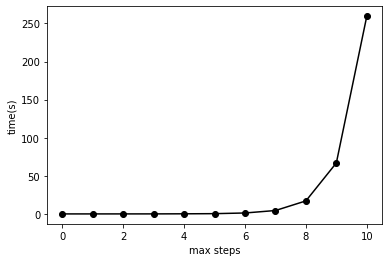

In [ ]:
  env = Environment() # 환경 객체 생성
  initial_position = np.array([0,0]) # 처음 위치 0,0
  agent = Agent(initial_position) # 에이전트 객체 생성
  max_step_number = 11 # 스텝 11번
  time_len = []
  
  for max_step in range(max_step_number): # 0~10
    v_table = np.zeros((env.reward.shape[0], env.reward.shape[1])) # 상태가치함수 저장하는 행렬
    start_time = time.time() # 시간 클래스 객체 생성
    for i in range(env.reward.shape[0]):
       for j in range(env.reward.shape[1]):
         agent.set_pos([i,j]) # 현재 위치
         v_table[i,j] = state_value_function(env, agent, 0, max_step, 0) # 상태가치함수 계산 
    time_len.append(time.time() - start_time) # 시간 계산
    print('\n단계 수 = {} 실행시간 = {}'.format(max_step, np.round(time.time()-start_time,2))) 
    show_v_table(np.round(v_table,2), env)# 테이블 출력
    
  print('Reward') 
  show_v_table(np.array(env.reward_list), env) # 최종 테이블
  
  policy = np.zeros((env.reward.shape[0], env.reward.shape[1])) # 정책 저장 테이블
  policy = policy_extraction(env, agent, v_table, policy) # 정책 찾기
  show_policy(policy, env) # 정책 출력
  plt.plot(time_len, 'o-k') # 걸린시간
  plt.xlabel('max steps') 
  plt.ylabel('time(s)') 
  plt.show()

In [ ]:
def action_value_function(env, agent, act, G, max_step, now_step): # 상태 행동 가치 함수
  gamma = 0.9  # 할인율

  if env.reward_list1 [agent.pos[0]][agent.pos[1]] == 'goal': # 위치가 goal이면
     return env.goal # 보상값 2
  if max_step == now_step:# 스텝을 최대로 갔으면
     observation, reward, done = env.move(agent, act) # 이동 후 상태값, 보상값, 완료 유무
     G += agent.select_action_pr[act]*reward # 누적 보상합계 계산
     return G # 누적보상합계 출력
  else:
     pos1 = agent.get_pos() # 현재 위치
     observation, reward, done = env.move(agent, act) # 이동 후 상태값, 보상값, 완료 유무
     G += agent.select_action_pr[act]*reward # 누적 보상합계 계산
     
     if done == True: # 끝났으면
        if observation[0]<0 or observation[0]>=env.reward.shape[0] or observation[1]<0 or observation[1]>=env.reward.shape[1]: # 범위 벗어나면
              agent.set_pos(pos1)# 현재 위치로
     pos1 = agent.get_pos() # 현재위치를 받아서
     for i in range(len(agent.action)):# 네방향
          agent.set_pos(pos1) 
          next_v = action_value_function(env, agent, i, 0, max_step, now_step+1) # 움직였을 때 행동가치함수를 취한 보상값
          G += agent.select_action_pr[i]*gamma*next_v  # 누적 보상합계 계산
     return G# 누적보상합계 출력

In [ ]:
def show_q_table(q_table, env): # 행동가치 함수 값을 저장
  for i in range(env.reward.shape[0]):
    print('+-----------------'*env.reward.shape[1], end='') # 칸을 만든다
    print('+') 
    for k in range(3):
      print('|', end='') 
      for j in range(env.reward.shape[1]): 
        if k==0: 
          print('{0:10.2f}       |'.format(q_table[i,j,0]),end='')# 칸 나누기
        if k==1:
          print('{0:6.2f}  {1:6.2f}   |'.format(q_table[i,j,3],q_table[i,j,1]),end='') # 칸 나누기
        if k==2:  
          print('{0:10.2f}       |'.format(q_table[i,j,2]),end='')# 칸 나누기
      print() 
  print('+-----------------'*env.reward.shape[1], end='') # 칸을 만든다
  print('+')

In [ ]:

def show_q_table_arrow(q_table,env): # 정책
 for i in range(env.reward.shape[0]): 
      print('+-----------------'*env.reward.shape[1],end=''); print('+')
      for k in range(3):
         print('|', end='')
         for j in range(env.reward.shape[1]):
            if k==0:# 0이면 위 화살표
               if np.max(q[i,j,:]) == q[i,j,0]:
                  print('        ↑       |',end='') 
               else:
                  print('                 |',end='')
            if k==1: # 1이면 좌우 화살표
               if np.max(q[i,j,:]) == q[i,j,1] and np.max(q[i,j,:]) == q[i,j,3]:
                  print('      ←  →     |',end='')
               elif np.max(q[i,j,:]) == q[i,j,1]:
                  print('        →       |',end='')
               elif np.max(q[i,j,:]) == q[i,j,3]:
                  print('        ←       |',end='')
               else:
                  print('                 |',end='')
            if k==2:# 2이면 아래 화살표
               if np.max(q[i,j,:]) == q[i,j,2]:
                  print('        ↓       |',end='')
               else:
                  print('                 |',end='')
         print()
 print('+-----------------'*env.reward.shape[1],end=''); print('+') 


In [ ]:
  env = Environment() # 환경 객체 생성
  initial_position = np.array([0,0]) # 처음 위치 0,0
  agent = Agent(initial_position)# 에이전트 객체 생성
  np.random.seed(0) # 랜덤시드 생성
  max_step_number = 8 # 스텝 8번
  
  for max_step in range(max_step_number): # 0~7
    print('max_step = {}'.format(max_step))
    q_table = np.zeros((env.reward.shape[0], env.reward.shape[1], len(agent.action))) # 행동 가치함수 저장하는 행렬
    for i in range(env.reward.shape[0]):
       for j in range(env.reward.shape[1]):
          for action in range(len(agent.action)):
            agent.set_pos([i,j])# 현재 위치
            q_table[i,j,action] = action_value_function(env, agent, action, 0, max_step, 0) # 행동가치함수 계산

    q = np.round(q_table, 2)
    print('\nQ-table') 
    show_q_table(q, env)  #q 테이블 출력
    print('\n정책')
    show_q_table_arrow(q, env) # 화살표 출력

max_step = 0

Q-table
+-----------------+-----------------+-----------------+-----------------+
|     -0.75       |     -0.75       |     -0.75       |     -0.75       |
| -0.75   -0.25   | -0.25   -0.25   | -0.25   -0.25   | -0.25   -0.75   |
|     -0.25       |     -0.25       |     -0.50       |     -0.25       |
+-----------------+-----------------+-----------------+-----------------+
|     -0.25       |     -0.25       |     -0.25       |     -0.25       |
| -0.75   -0.25   | -0.25   -0.50   | -0.25   -0.25   | -0.50   -0.75   |
|     -0.25       |     -0.25       |     -0.25       |      0.50       |
+-----------------+-----------------+-----------------+-----------------+
|     -0.25       |     -0.25       |     -0.50       |      2.00       |
| -0.75   -0.25   | -0.25   -0.25   | -0.25    0.50   |  2.00    2.00   |
|     -0.75       |     -0.75       |     -0.75       |      2.00       |
+-----------------+-----------------+-----------------+-----------------+

정책
+-----------

[1]	valid_0's multi_logloss: 0.997777	valid_0's multi_logloss: 0.997777
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's multi_logloss: 0.895442	valid_0's multi_logloss: 0.895442
[3]	valid_0's multi_logloss: 0.809103	valid_0's multi_logloss: 0.809103
[4]	valid_0's multi_logloss: 0.732391	valid_0's multi_logloss: 0.732391
[5]	valid_0's multi_logloss: 0.669225	valid_0's multi_logloss: 0.669225
[6]	valid_0's multi_logloss: 0.608976	valid_0's multi_logloss: 0.608976
[7]	valid_0's multi_logloss: 0.557876	valid_0's multi_logloss: 0.557876
[8]	valid_0's multi_logloss: 0.513242	valid_0's multi_logloss: 0.513242
[9]	valid_0's multi_logloss: 0.470866	valid_0's multi_logloss: 0.470866
[10]	valid_0's multi_logloss: 0.437898	valid_0's multi_logloss: 0.437898
[11]	valid_0's multi_logloss: 0.403873	valid_0's multi_logloss: 0.403873
[12]	valid_0's multi_logloss: 0.375711	valid_0's multi_logloss: 0.375711
[13]	valid_0's multi_logloss: 0.348203	valid_0's multi_logloss: 0.3482

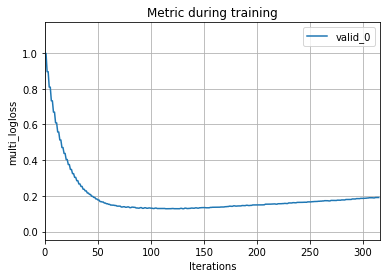

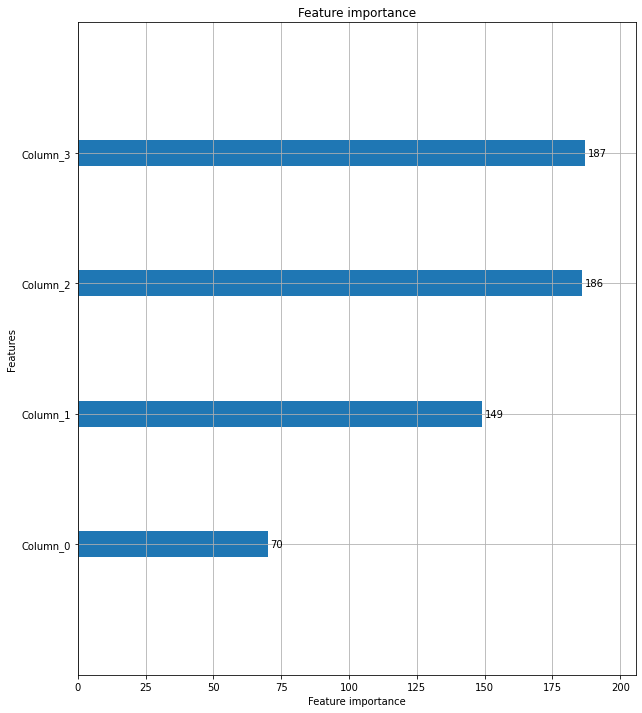

In [ ]:
#LightBoost

!pip install lightgbm 
from lightgbm import LGBMClassifier, LGBMRegressor 
from lightgbm import plot_importance, plot_metric, plot_tree 
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_validate

iris = load_iris() # 아이리스 데이터
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=123)  # 데이터 분할. 테스트 데이터 0.2
Igbmc = LGBMClassifier (n_estimators=400)  # light GBM 적용. n_estimators는 반복 수행하는 트리의 개수 400
evals = [(X_test, y_test)] # 입력, 출력 데이터
Igbmc.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)  # 학습
preds = Igbmc.predict(X_test)  # 입력 데이테에 대해 예측

cross_val = cross_validate ( # 교차검증
     estimator=Igbmc, 
     X=iris.data, y=iris.target, 
     cv=5
)
# 평가 지표 출력
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std())) # 예측 시간
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))  # 스코어 타임
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std())) # 테스트 스코어

plot_metric(Igbmc) # ROC 곡선 그리기
plot_importance(Igbmc, figsize=(10,12)) # 시각화화

In [ ]:
# CatBoost

!pip install catboost

import pandas as pd 
import numpy as np 
from catboost import Pool, CatBoostClassifier 
from catboost.datasets import rotten_tomatoes

learn, _ = rotten_tomatoes() # 데이터 불러오기
print('Feature names #n' + ', '.join(list(learn)))

auxiliary_columns = ['id','theater_date', 'dvd_date', 'rating', 'date']  # 보조 컬럼
cat_features = ['rating_MPAA', 'studio', 'fresh', 'critic', 'top_critic', 'publisher'] # cat 특성 
text_features = ['synopsis', 'genre', 'director', 'writer', 'review']# 텍스트 특성


def get_processed_rotten_tomatoes():
    learn, test = rotten_tomatoes()
  
    def fill_na(df, features): # 결측값 채우기
        for feature in features:
            df[feature].fillna('', inplace=True) # nan을 대체

    def preprocess_data_part(data_part):
        data_part = data_part.drop(auxiliary_columns, axis=1)

        fill_na(data_part, cat_features) # 결측값 채우기
        fill_na(data_part, text_features)# 결측값 채우기
    
        X = data_part.drop(['rating_10'], axis=1) # 지우기
        y = data_part['rating_10']
        return X, y

    X_learn, y_learn = preprocess_data_part(learn) 
    X_test, y_test = preprocess_data_part(test)

    return X_learn, X_test, y_learn, y_test

X_train, X_test, y_train, y_test = get_processed_rotten_tomatoes()


def fit_catboost_on_rotten_tomatoes(X_train, X_test, y_train, y_test, catboost_params={}, verbose=100): 
    learn_pool = Pool( # 학습데이터
       X_train,
       y_train, 
       cat_features=cat_features, 
       text_features=text_features, 
       feature_names=list(X_train)
    )
    test_pool = Pool( # 테스트 데이터
       X_test, 
       y_test, 
       cat_features=cat_features, 
       text_features=text_features, 
       feature_names=list(X_train)
    )

    catboost_default_params={ # GPU로 돌려야 함
       'iterations': 1000, 
       'learning_rate': 0.03, 
       'eval_metric': 'Accuracy', 
       'task_type': 'GPU'
     }

    catboost_default_params.update(catboost_params)

    model = CatBoostClassifier(**catboost_default_params) #이상 향상 분류자에 대한 모델 
    model.fit(learn_pool, eval_set=test_pool, verbose=verbose) # 모델 학습

    return model

fit_catboost_on_rotten_tomatoes(X_train, X_test, y_train, y_test)

     |████████████████████████████████| 67.3MB 71kB/s 
Feature names #nid, synopsis, rating_MPAA, genre, director, writer, theater_date, dvd_date, box_office, runtime, studio, dvd_date_int, theater_date_int, review, rating, fresh, critic, top_critic, publisher, date, date_int, rating_10
0:	learn: 0.3858217	test: 0.3980927	best: 0.3980927 (0)	total: 185ms	remaining: 3m 4s
100:	learn: 0.4456469	test: 0.4547011	best: 0.4555569 (98)	total: 13.7s	remaining: 2m 2s
200:	learn: 0.4569271	test: 0.4620369	best: 0.4621592 (197)	total: 24.7s	remaining: 1m 38s
300:	learn: 0.4636219	test: 0.4636264	best: 0.4638709 (296)	total: 34.1s	remaining: 1m 19s
400:	learn: 0.4722732	test: 0.4671720	best: 0.4677833 (381)	total: 43.9s	remaining: 1m 5s
500:	learn: 0.4785094	test: 0.4668052	best: 0.4685169 (460)	total: 54.1s	remaining: 53.9s
600:	learn: 0.4838591	test: 0.4677833	best: 0.4685169 (460)	total: 1m 3s	remaining: 42.4s
700:	learn: 0.4898814	test: 0.4674166	best: 0.4685169 (460)	total: 1m 13s	remaining: 

In [ ]:
def policy_evaluation(env, agent, v_table, policy): # 정책 평가 함수
  while True:
    delta=0
    temp_v=copy.deepcopy(v_table)
    for i in range(env.reward.shape[0]): # 각 상태
      for j in range(env.reward.shape[1]):
        agent.set_pos([i,j])
        action=policy[i,j] # 정책에 따라 행동 결정
        observation, reward, done=env.move(agent, action) # 행동에 따라 이동 후 보상이 주어짐
        v_table[i,j]=reward+gamma*v_table[observation[0], observation[1]] # 새로운 상태 가치 함수 계산
    delta=np.max([delta,np.max(np.abs(temp_v-v_table))])
    if delta<0.000001: # 수렴할 때까지 반복
      break
  return v_table,delta # 상태 가치 함수 반환


In [ ]:
def policy_improvement(env, agent, v_table, policy): # 정책 개선
  pilicyStable = True 
  for i in range(env.reward.shape[0]): 
    for j in range(env.reward.shape[1]):
      old_action = policy[i,j] # 정책을 전 행동으로 저장
      temp_action = 0
      temp_value = -1e+10
      
      for action in range(len(agent.action)):
        agent.set_pos([i,j]) # 정책에 따라 행동 결정
        observation, reward, done = env.move(agent, action)  # 행동에 따라 이동 후 보상이 주어짐
        if temp_value < reward + gamma*v_table[observation[0], observation[1]]: # 계산한 상태가치함수가 크면
          temp_action = action # 행동을 저장
          temp_value = reward + gamma*v_table[observation[0], observation[1] # 상태 가치함수 저장
          if old_action != temp_action: # 전 행동과 새로운 행동이 같지 않으면 
            policyStable = False # 정책을 false로
          policy[i,j] = temp_action  # 행동 저장
    return policy, policyStable # 정책 반환 

In [ ]:
np.random.seed(0) # 랜덤시드 생성
env = Environment() # 환경 객체 생성
initial_position = np.array([0,0]) # 초기 위치 
agent = Agent(initial_position) # 에이전트 객체 생성
gamma = 0.0 # 감마

v_table = np.random.rand(env.reward.shape[0], env.reward.shape[1]) # 상태 가치 함수 저장 자료 구조
policy = np.random.randint(0,4, (env.reward.shape[0], env.reward.shape[1])) # 정책 저장 자료구조

import copy

max_iter_number = 20000 
for iter_number in range(max_iter_number):
  v_table, delta = policy_evaluation(env, agent, v_table, policy) # 정책 평가를 통해 상태 가치함수를 만든다
  policy, policyStable = policy_improvement(env, agent, v_table, policy) # 상태 가치 함수를 이용해 정책 개선
  show_v_table(v_table, env) # 상태 가치 함수 출력
  show_policy (policy, env) # 정책 출력
  
  if policyStable == True:
    break

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
+-----------------+-----------------+-----------------+-----------------+
|                 |                 |                 |                 |
|       -1.00     |       -1.00     |       -1.00     |       -1.00     |
|                 |                 |                 |                 |
+-----------------+-----------------+-----------------+-----------------+
|                 |                 |                 |                 |
|       -1.00     |       -1.00     |       -1.00     |       -1.00     |
|                 |                 |                 |                 |
+-----------------+-----------------+-----------------+-----------------+
|                 |                 |                 |                 |
|       -3.00     |       -1.00     |       -1.00     |        2.00     |
|                 |                 |                 |                 |
+-----------------+-----------------+-----------------+-----------------+
+-

In [ ]:
#가치 반복

import copy 
env = Environment() # 환경 객체 생성
initial_position = np.array([0,0]) # 초기 위치
agent = Agent(initial_position) # 에이전트 객체 생성
np.random.seed(0) # 랜덤 시드 생성
gamma = 0.9 # 감마

v_table = np.zeros((env.reward.shape[0], env.reward.shape[1])) # 상태 가치 함수
k = 1

# 상태 가치함수 학습
while True:
  delta = 0
  temp_v = copy.deepcopy(v_table)
    
  for i in range(env.reward.shape[0]):
    for j in range(env.reward.shape[1]):
       G = 0 # 누적보상합계
       for action in range(len(agent.action)):
         agent.set_pos([i,j]) # 정책에 따라 행동 결정
         observation, reward, done = env.move(agent, action)# 행동에 따라 이동 후 보상이 주어짐
         G += agent.select_action_pr[action]*(reward+gamma*v_table[observation[0], observation[1]]) # 이미 계산된 v값을 이용해 계산 
       v_table[i,j] = G # 상태가치함수에 저장
  delta = np.max([delta, np.max(np.abs(temp_v - v_table))]) # 차이값
  show_v_table(v_table, env)
  k += 1
  if delta < 0.00001: # 수렴할 때까지 반복
    break

policy = np.zeros((env.reward.shape[0], env.reward.shape[1]))
policy = policy_extraction(env, agent, v_table, policy) # 정책 계산
show_policy(policy,env) # 정책 출력

+-----------------+-----------------+-----------------+-----------------+
|                 |                 |                 |                 |
|       -2.00     |       -1.95     |       -2.19     |       -2.49     |
|                 |                 |                 |                 |
+-----------------+-----------------+-----------------+-----------------+
|                 |                 |                 |                 |
|       -1.95     |       -2.13     |       -1.97     |       -2.00     |
|                 |                 |                 |                 |
+-----------------+-----------------+-----------------+-----------------+
|                 |                 |                 |                 |
|       -2.44     |       -2.53     |       -2.01     |        2.00     |
|                 |                 |                 |                 |
+-----------------+-----------------+-----------------+-----------------+
+-----------------+-----------------+-

In [1]:
#에피소드 생성

def generate_episode_with_policy(env, agent, first_visit, policy): # 정책에 따라 에피소드 생성에피소드 생성
  gamma = 0.09 
  episode = [] # 에피소드 배열
  visit = np.zeros((env.reward.shape[0], env.reward.shape[1], len(agent.action))) # 방문 여부 정보
  
  i = 0; j = 0 
  agent.set_pos([i,j])  # 에이전트 위치
  G = 0; step = 0; max_step = 100 # G는 누적 보상값
  
  for k in range(max_step): # 전체 단계 몇번
    pos = agent.get_pos()  # 에이전트의 현재 위치에서 시작
    
    action = np.random.choice(range(0, len(agent.action)), p=policy[pos[0],pos[1],:]) # 정책에 따라 행동을 선택
    observation, reward, done = env.move(agent, action) # 행동에 따른 이동
    if first_visit: # 첫 방문일 때
      if visit[pos[0], pos[1], action] == 0:
        G += gamma**(step)*reward # 누적 보상값 계산
        visit[pos[0], pos[1], action] = 1 # 방문 상태 변경
        step += 1 # 단계 증가
        episode.append((pos, action, reward)) # 상태, 행동, 보상이 저장 됨
    else:
      G += gamma**(step) *reward # 누적 보상값 계산
      step += 1# 단계 증가
      episode.append((pos, action, reward))  # 상태, 행동, 보상이 저장 됨
    if done == True: # 참이면 종료
      break
  return i, j, G, episode

In [ ]:
#행동가치 함수, 최적 행동, 정책 초기화

np.random.seed(0) # 랜덤 시드 생성
env = Environment()  # 환경 객체 생성
initial_position = np.array([0,0]) # 초기 위치
agent = Agent(initial_position) # 에이전트 객체 생성

Q_table = np.random.rand(env.reward.shape[0], env.reward.shape[1], len(agent.action)) # 행동 가치 함수 자료구조
print('초기Q(s,a)') 
show_q_table(Q_table, env) 

Q_visit = np.zeros((env.reward.shape[0], env.reward.shape[1], len(agent.action))) # 방문
optimal_a = np.zeros((env.reward.shape[0], env.reward.shape[1])) # 최적

for i in range(env.reward.shape[0]):
  for j in range(env.reward.shape[1]):
    optimal_a[i,j] = np.argmax(Q_table[i,j,:]) # 최적의 행동
print('초기 optimal_a') 
show_policy(optimal_a, env) # 정책 출력

policy = np.zeros((env.reward.shape[0], env.reward.shape[1], len(agent.action))) 
epsilon = 0.8 # 입실론 0.8
for i in range(env.reward.shape[0]): 
  for j in range(env.reward.shape[1]): 
    for k in range(len(agent.action)): 
      if optimal_a[i,j] == k: # 0.8을 4개의 행동으로 나눈다
        policy[i,j,k] = 1 - epsilon + epsilon/len(agent.action) # 선택 확률
      else:
        policy[i,j,k] = epsilon/len(agent.action)
print('초기 정책')
show_q_table(policy, env)

초기Q(s,a)
+-----------------+-----------------+-----------------+-----------------+
|      0.55       |      0.42       |      0.96       |      0.57       |
|  0.54    0.72   |  0.89    0.65   |  0.53    0.38   |  0.09    0.93   |
|      0.60       |      0.44       |      0.79       |      0.07       |
+-----------------+-----------------+-----------------+-----------------+
|      0.02       |      0.98       |      0.12       |      0.52       |
|  0.87    0.83   |  0.78    0.80   |  0.94    0.64   |  0.77    0.41   |
|      0.78       |      0.46       |      0.14       |      0.26       |
+-----------------+-----------------+-----------------+-----------------+
|      0.46       |      0.61       |      0.36       |      0.67       |
|  0.62    0.57   |  0.68    0.62   |  0.06    0.44   |  0.13    0.67   |
|      0.02       |      0.94       |      0.70       |      0.21       |
+-----------------+-----------------+-----------------+-----------------+
초기 optimal_a
+---------------

In [ ]:
#몬테카를로 강화학습

max_episode = 10000 # 에피소드 10만개
first_visit = True 
gamma = 0.09 
for epi in range(max_episode): 
  x,y,G, episode = generate_episode_with_policy(env, agent, first_visit, policy)# 에피소드 생성

for step_num in range(len(episode)): # 각 에피소드에 대해
  G = 0
  i = episode[step_num][0][0] # 상태[0]
  j = episode[step_num][0][1] #상태[1]
  action = episode[step_num][1]  # 행동
  Q_visit[i,j,action] += 1 
  for step, k in enumerate(episode[step_num:]): # 상태, 행동, 보상
    G += gamma**(step)*k[2] # 누적 보상값 계산
    
  Q_table[i,j,action] += 1/Q_visit[i,j,action]*(G-Q_table[i,j, action]) # 새로운 행동 가치 함수
  for i in range(env.reward.shape[0]):
    for j in range(env.reward.shape[1]):
      optimal_a[i,j] = np.argmax(Q_table[i,j,:]) # 최적 행동
  epsilon = 1 - epi/max_episode

  for i in range(env.reward.shape[0]): 
    for j in range(env.reward.shape[1]):
      for k in range(len(agent.action)): 
        if optimal_a[i,j] == k:
          policy[i,j,k] = 1 - epsilon + epsilon/len(agent.action) # 정책 계산
        else:
          policy[i,j,k] = epsilon/len(agent.action) 

print('최종 Q(s,a)'); show_q_table(Q_table, env) # 행동가치함수 출력
print('최종 정책'); show_q_table(policy, env) # 정책 출력
print('최종 optimal_a'); show_policy(optimal_a, env) # 최적 행동 출력

최종 Q(s,a)
+-----------------+-----------------+-----------------+-----------------+
|      0.55       |      0.42       |      0.96       |      0.57       |
|  0.54   -1.10   | -1.10    0.65   |  0.53    0.38   |  0.09    0.93   |
|      0.60       |     -1.11       |      0.79       |      0.07       |
+-----------------+-----------------+-----------------+-----------------+
|      0.02       |      0.98       |      0.12       |      0.52       |
| -3.00    0.83   | -1.27    0.80   |  0.94    0.64   |  0.77    0.41   |
|      0.78       |      0.46       |      0.14       |      0.26       |
+-----------------+-----------------+-----------------+-----------------+
|      0.46       |      0.61       |      0.36       |      0.67       |
|  0.62    0.57   |  0.68    0.62   |  0.06    0.44   |  0.13    0.67   |
|      0.02       |      0.94       |      0.70       |      0.21       |
+-----------------+-----------------+-----------------+-----------------+
최종 정책
+-----------------+---

In [ ]:
# 시간차 예측

np.random.seed(0) # 랜덤 시드 생성
env = Environment() # 환경 객체
initial_position = np.array([0,0]) # 초기 위치 
agent = Agent(initial_position) # 에이전트 갱체
gamma = 0.9 # 감마

V = np.zeros((env.reward.shape[0], env.reward.shape[1])) # 상태 가치 함수 정보
max_episode = 10000 # 최대 에피소드
max_step = 100 # 최대 단계
alpha = 0.01 
print('TD(O) 예측 시작')

for epi in range(max_episode): # 에피소드
  delta = 0 
  i = 0; j = 0 
  agent.set_pos([i,j]) # 에이전트 위치
  for k in range(max_step):
      pos = agent.get_pos() # 현재 에이전트 위치
      action = np.random.randint(0,len(agent.action)) # 행동 선택 
      observation, reward, done = env.move(agent, action) # 행동에 따른 이동
      V[pos[0],pos[1]] += alpha * (reward + gamma * V[observation[0],observation[1]] - V[pos[0],pos[1]]) # V(s)+a(r+rV(s')-V(s))
      
      if done == True:
          break 
          
print('V(s)') 
show_v_table(np.round(V,2), env) # 상태 가치 함수 출력
policy = np.zeros((env.reward.shape[0], env.reward.shape[1])) 
policy = policy_extraction(env, agent, V, policy) # 정책
show_policy(policy, env) # 정책 출력

TD(O) 예측 시작
V(s)
+-----------------+-----------------+-----------------+-----------------+
|                 |                 |                 |                 |
|      -13.21     |      -11.34     |       -9.46     |       -7.62     |
|                 |                 |                 |                 |
+-----------------+-----------------+-----------------+-----------------+
|                 |                 |                 |                 |
|      -11.99     |      -10.29     |       -7.02     |       -4.37     |
|                 |                 |                 |                 |
+-----------------+-----------------+-----------------+-----------------+
|                 |                 |                 |                 |
|      -11.78     |       -9.55     |       -5.17     |        4.30     |
|                 |                 |                 |                 |
+-----------------+-----------------+-----------------+-----------------+
+-----------------+--

In [ ]:
# SARSA 알고리즘

def greedy(Q_table,agent,epsilon): # 그리디
    pos = agent.get_pos()
    return np.argmax(Q_table[pos[0],pos[1],:]) # 행동 중 가장 큰 값을 선택

def e_greedy(Q_table,agent,epsilon):# 입실론 그리디 방법
    pos = agent.get_pos()
    greedy_action = np.argmax(Q_table[pos[0],pos[1],:]) # 행동 중 가장 큰 값
    pr = np.zeros(len(agent.action))
    for i in range(len(agent.action)):
        if i == greedy_action: # 가장 크면
            pr[i] = 1 - epsilon + epsilon/len(agent.action) # 1-epsilon 확률
        else: # 아니면
            pr[i] = epsilon / len(agent.action)
    return np.random.choice(range(0,len(agent.action)), p=pr)     # 확률에 따라

np.random.seed(0) # 랜덤 시드 생성
env = Environment() # 환경 객체 생성
initial_position = np.array([0,0]) # 초기 위치
agent = Agent(initial_position) # 에이전트 객체 생성
gamma = 0.9 
Q_table = np.random.rand(env.reward.shape[0], env.reward.shape[1],len(agent.action)) # 행동 가치 함수. 무작위 선택
Q_table[2,3,:] = 0 

max_episode = 10000; max_step = 100 # 에피소드 10000, 최대 단계 100
alpha = 0.1; epsilon = 0.8 

for epi in range(max_episode): # 에피소드 만큼 반복
    delta = 0 
    i = 0; 
    j = 0 
    agent.set_pos([i,j]) # 현재 상태
    temp = 0
    action = e_greedy(Q_table,agent,epsilon) # 입실론 그리디 방법 사용해 행동 선택
    for k in range(max_step):
        pos = agent.get_pos() 
        observation, reward, done = env.move(agent, action) # 행동에 따라 이동 후 보상이 주어짐
        next_action = e_greedy(Q_table, agent, epsilon) # 다음상태를 찾을 때 입실론 그리디 방법 사용
        Q_table[pos[0],pos[1],action] += alpha * (reward + gamma * Q_table[observation[0], observation[1],next_action] - Q_table[pos[0],pos[1],action]) #기존 큐값과 새로 나타나는 큐값의 차에 감하를 곱함고 보상을 더해 알파를 곱함
        action = next_action 
        if done == True:
            break 
optimal_policy = np.zeros((env.reward.shape[0], env.reward.shape[1])) # 최적 정책
for i in range(env.reward.shape[0]): 
  for j in range(env.reward.shape[1]):
      optimal_policy[i,j] = np.argmax(Q_table[i,j,:]) # 최대
      
print('SARSA: Q(s,a)'); show_q_table(np.round(Q_table, 2), env) # 큐 테이블 출력
print('SARSA: 최적 정책'); show_policy(optimal_policy, env)# 최적 정책 출력

SARSA: Q(s,a)
+-----------------+-----------------+-----------------+-----------------+
|     -8.38       |     -7.53       |     -4.18       |     -0.80       |
| -9.08   -4.59   | -7.45   -3.00   | -4.78    0.36   | -3.14   -1.76   |
|     -5.58       |     -2.90       |     -1.63       |      5.14       |
+-----------------+-----------------+-----------------+-----------------+
|     -7.16       |     -5.12       |     -2.76       |      0.73       |
| -6.64   -3.20   | -6.32   -1.84   | -4.03    5.48   | -2.61    2.67   |
|     -4.24       |      2.37       |      5.99       |     18.51       |
+-----------------+-----------------+-----------------+-----------------+
|     -5.63       |     -3.43       |     -0.57       |     18.41       |
| -6.86   -1.24   | -3.38    8.88   | -0.64   18.54   | 18.46   18.35   |
|     -6.06       |     -0.90       |      2.23       |     18.50       |
+-----------------+-----------------+-----------------+-----------------+
SARSA: 최적 정책
+----------

In [ ]:
# Q-학습 알고리즘
np.random.seed(0) # 랜덤 시드 생성
env = Environment() # 환경 객체 생성
initial_position = np.array([0,0]) # 초기 위치
agent = Agent(initial_position) # 에이전트 객체 생성
gamma = 0.9 
Q_table = np.random.rand(env.reward.shape[0], env.reward.shape[1], len(agent.action)) # 행동 가치 함수. 무작위 선택
Q_table[2,3,:] = 0 
max_episode = 10000; max_step = 100 # 에피소드 10000, 최대 단계 100
alpha = 0.1; epsilon = 0.8

for epi in range(max_episode):# 에피소드만큼 반복
    delta = 0; i = 0; j = 0 
    agent.set_pos([i,j]); temp = 0  # 현재 위치
    
    for k in range(max_step):# 최대 단계까지 반복
        pos = agent.get_pos() 
        action = e_greedy(Q_table, agent, epsilon) # 입실론 그리디 사용
        observation, reward, done = env.move(agent, action) # 행동에 따라 이동 후 보상이 주어짐
        next_action = greedy(Q_table, agent, epsilon) # 그리디 방법을 통해 다음 행동 선택
        Q_table[pos[0], pos[1], action] += alpha*(reward + 
                                                  gamma*Q_table[observation[0], observation[1], next_action] - Q_table[pos[0], pos[1], action]) #기존 큐값과 새로 나타나는 큐값의 차에 감하를 곱함고 보상을 더해 알파를 곱함
        action = next_action 
        if done == True:
            break 
optimal_policy = np.zeros((env.reward.shape[0], env.reward.shape[1])) 
for i in range(env.reward.shape[0]): 
  for j in range(env.reward.shape[1]):
      optimal_policy[i,j] = np.argmax(Q_table[i,j,:]) # 정책은 최대값으로 선택
print('Q-learning: Q(s, a)'); show_q_table(np.round(Q_table, 2), env) # 큐 테이블 출력
print('Q-learning 14 *H'); show_policy(optimal_policy, env) # 최적 정책 출력

Q-learning: Q(s, a)
+-----------------+-----------------+-----------------+-----------------+
|      5.49       |      7.42       |      9.43       |     11.78       |
|  5.49    9.43   |  7.48   11.49   |  9.40   13.92   | 11.35   11.68   |
|      9.44       |     11.60       |     12.94       |     16.61       |
+-----------------+-----------------+-----------------+-----------------+
|      7.49       |      9.43       |     11.48       |     13.77       |
|  7.43   11.60   |  9.43   12.99   | 11.58   16.63   | 12.90   14.49   |
|     11.59       |     14.00       |     16.67       |     19.63       |
+-----------------+-----------------+-----------------+-----------------+
|      9.42       |     11.59       |     12.97       |     19.59       |
|  9.55   13.99   | 11.58   16.68   | 13.99   19.65   | 19.64   19.60   |
|      9.58       |     11.99       |     14.65       |     19.61       |
+-----------------+-----------------+-----------------+-----------------+
Q-learning 14 *H
+

In [ ]:
# 연속영역의 가치함수 근사와 정책 근사
np.random.seed(0) # 랜덤시드 생성
env = Environment() # 환경 객체 생성
initial_position = np.array([0,0]) # 초기 위치
agent = Agent(initial_position) # 에이전트 객체 생성
gamma = 0.9 
w = np.random.rand(3) 
w -= 0.5 
v_table = np.zeros((env.reward.shape[0], env.reward.shape[1]))
for i in range(env.reward.shape[0]): 
  for j in range(env.reward.shape[1]):
      v_table[i,j] = w[0] + w[1] * i + w[2] * j #상태 가치 함수를 근사하는 함수

max_episode = 10000; max_step = 100; alpha = 0.01; epsilon = 0.3 
for epi in range(max_episode): # 에피소드만큼 반복
    delta = 0; i = 0; j = 0 # 처음 상태
    agent.set_pos([i,j]); temp = 0 
    for k in range(max_step):
        pos = agent.get_pos() # 현재 위치
        action = np.random.randint(0, len(agent.action)) # 행동 무작위로 선택 
        observation, reward, done = env.move(agent, action) # 행동에 따라 이동 후 보상이 주어짐
        now_v = 0; next_v = 0 
        now_v = w[0] + np.dot(w[1:],pos) # 현재 상태의 상태 가치 함수
        next_v = w[0] + np.dot(w[1:],observation) # 다음 상태의 v값
        w[0] += alpha * ( reward + gamma * next_v - now_v ) # 경사 하강법
        w[1] += alpha * ( reward + gamma * next_v - now_v ) * pos[0]# 경사 하강법
        w[2] += alpha * ( reward + gamma * next_v - now_v ) * pos[1] # 경사 하강법
        if done == True:
                break 
for i in range(env.reward.shape[0]): 
  for j in range(env.reward.shape[1]):
        v_table[i,j] = w[0] + w[1] * i + w[2] * j # 학습된 결과를 이용해 상태 가치 함수 계산
print('함수 근사: V(s)'); show_v_table(np.round(v_table, 2), env) 
policy = np.zeros((env.reward.shape[0], env.reward.shape[1])) 
policy = policy_extraction(env, agent, v_table, policy); show_policy(policy, env) # 정책 출력

함수 근사: V(s)
+-----------------+-----------------+-----------------+-----------------+
|                 |                 |                 |                 |
|      -15.40     |      -14.77     |      -14.14     |      -13.51     |
|                 |                 |                 |                 |
+-----------------+-----------------+-----------------+-----------------+
|                 |                 |                 |                 |
|      -14.80     |      -14.17     |      -13.54     |      -12.91     |
|                 |                 |                 |                 |
+-----------------+-----------------+-----------------+-----------------+
|                 |                 |                 |                 |
|      -14.20     |      -13.57     |      -12.94     |      -12.31     |
|                 |                 |                 |                 |
+-----------------+-----------------+-----------------+-----------------+
+-----------------+-------